In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd  
import tensorflow as tf

In [17]:
modelT5 = tf.keras.models.load_model("/kaggle/input/all-model/t5_win41_acc.h5")
modelT5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 41, 64)            65600     
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 20, 64)            0         
                                                                 
 conv1d_31 (Conv1D)          (None, 20, 128)           8320      
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 10, 128)          0         
 g1D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 10, 128)         

In [18]:
data = np.load("/kaggle/input/data41-t5/data41.npz")
positive = data["positive"]
negative = data["negative"]

Y_positive = np.ones(positive.shape[0])
Y_negative = np.zeros(negative.shape[0])
X = np.concatenate((positive, negative), axis=0)
Y = np.concatenate((Y_positive, Y_negative), axis=0)
print(X.shape)

(10027, 41, 1024)


In [19]:
model_output = modelT5.layers[-5].output
model_tsne = tf.keras.models.Model(inputs = modelT5.input, outputs = model_output)
model_tsne.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30_input (InputLayer  [(None, 41, 1024)]       0         
 )                                                               
                                                                 
 conv1d_30 (Conv1D)          (None, 41, 64)            65600     
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 20, 64)            0         
                                                                 
 conv1d_31 (Conv1D)          (None, 20, 128)           8320      
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 10, 128)          0   

In [20]:
X_Cnn = model_tsne.predict(X)
print(X_Cnn[:3])

314/314 [==============================] - 2s 5ms/step
[[0.         0.         0.         ... 0.         0.         0.09030397]
 [0.38509294 0.         0.         ... 0.03209302 0.         0.        ]
 [0.5522552  0.         0.         ... 0.         0.         0.        ]]


In [21]:
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=50, n_iter=1500)
z = tsne.fit_transform(X_Cnn) 

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10027 samples in 0.011s...
[t-SNE] Computed neighbors for 10027 samples in 5.673s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10027
[t-SNE] Computed conditional probabilities for sample 2000 / 10027
[t-SNE] Computed conditional probabilities for sample 3000 / 10027
[t-SNE] Computed conditional probabilities for sample 4000 / 10027
[t-SNE] Computed conditional probabilities for sample 5000 / 10027
[t-SNE] Computed conditional probabilities for sample 6000 / 10027
[t-SNE] Computed conditional probabilities for sample 7000 / 10027
[t-SNE] Computed conditional probabilities for sample 8000 / 10027
[t-SNE] Computed conditional probabilities for sample 9000 / 10027
[t-SNE] Computed conditional probabilities for sample 10000 / 10027
[t-SNE] Computed conditional probabilities for sample 10027 / 10027
[t-SNE] Mean sigma: 1.270919
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.803070
[t-SNE] KL

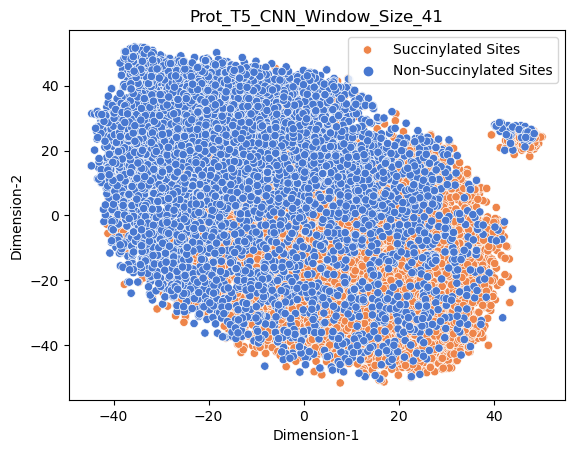

In [22]:
f, ax = plt.subplots(1, 1)
df = pd.DataFrame()
df["y"] = Y
df["Dimension-1"] = z[:,0]
df["Dimension-2"] = z[:,1]
sns.scatterplot(ax=ax, x="Dimension-1", y="Dimension-2", hue=df.y.tolist(),
                palette=sns.color_palette("muted", 2),
                data=df).set(title="Prot_T5_CNN_Window_Size_41") 
ax.legend(labels=["Succinylated Sites", "Non-Succinylated Sites"])
plt.savefig("/kaggle/working/Prot_T5_CNN_Window_Size_41.png")

# For protBert

In [35]:
modelBert = tf.keras.models.load_model("/kaggle/input/all-model/bert_win41_acc.h5")
modelBert.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_90 (Conv1D)          (None, 41, 64)            65600     
                                                                 
 max_pooling1d_90 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 dropout_135 (Dropout)       (None, 20, 64)            0         
                                                                 
 conv1d_91 (Conv1D)          (None, 20, 128)           8320      
                                                                 
 max_pooling1d_91 (MaxPoolin  (None, 10, 128)          0         
 g1D)                                                            
                                                                 
 dropout_136 (Dropout)       (None, 10, 128)         

In [36]:
data = np.load("/kaggle/input/databert2131/data41_bert.npz")
positive = data["positive"]
negative = data["negative"]

Y_positive = np.ones(positive.shape[0])
Y_negative = np.zeros(negative.shape[0])
X = np.concatenate((positive, negative), axis=0)
Y = np.concatenate((Y_positive, Y_negative), axis=0)
print(X.shape)

(10027, 41, 1024)


In [37]:
model_output = modelBert.layers[-5].output
model_tsne = tf.keras.models.Model(inputs = modelBert.input, outputs = model_output)
model_tsne.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_90_input (InputLayer  [(None, 41, 1024)]       0         
 )                                                               
                                                                 
 conv1d_90 (Conv1D)          (None, 41, 64)            65600     
                                                                 
 max_pooling1d_90 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 dropout_135 (Dropout)       (None, 20, 64)            0         
                                                                 
 conv1d_91 (Conv1D)          (None, 20, 128)           8320      
                                                                 
 max_pooling1d_91 (MaxPoolin  (None, 10, 128)          0   

In [38]:
X_Cnn = model_tsne.predict(X)
print(X_Cnn[:3])

314/314 [==============================] - 1s 4ms/step
[[0.         0.         0.11323404 ... 0.464081   0.         0.7003564 ]
 [0.         0.42633218 0.         ... 0.33284086 0.         0.38560566]
 [0.         0.5307683  0.         ... 0.3009849  0.         0.48330486]]


In [39]:
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=50, n_iter=1500)
z = tsne.fit_transform(X_Cnn) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10027 samples in 0.011s...


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10027 samples in 5.427s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10027
[t-SNE] Computed conditional probabilities for sample 2000 / 10027
[t-SNE] Computed conditional probabilities for sample 3000 / 10027
[t-SNE] Computed conditional probabilities for sample 4000 / 10027
[t-SNE] Computed conditional probabilities for sample 5000 / 10027
[t-SNE] Computed conditional probabilities for sample 6000 / 10027
[t-SNE] Computed conditional probabilities for sample 7000 / 10027
[t-SNE] Computed conditional probabilities for sample 8000 / 10027
[t-SNE] Computed conditional probabilities for sample 9000 / 10027
[t-SNE] Computed conditional probabilities for sample 10000 / 10027
[t-SNE] Computed conditional probabilities for sample 10027 / 10027
[t-SNE] Mean sigma: 0.863151
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.035110
[t-SNE] KL divergence after 1500 iterations: 2.954660


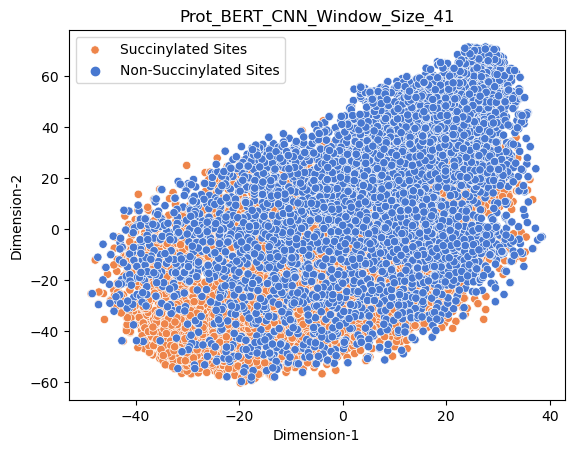

In [40]:
f, ax = plt.subplots(1, 1)
df = pd.DataFrame()
df["y"] = Y
df["Dimension-1"] = z[:,0]
df["Dimension-2"] = z[:,1]
sns.scatterplot(ax=ax, x="Dimension-1", y="Dimension-2", hue=df.y.tolist(),
                palette=sns.color_palette("muted", 2),
                data=df).set(title="Prot_BERT_CNN_Window_Size_41") 
ax.legend(labels=["Succinylated Sites", "Non-Succinylated Sites"])
plt.savefig("/kaggle/working/Prot_BERT_CNN_Window_Size_41.png")

### For combined

In [57]:
combinedModel = tf.keras.models.load_model("/kaggle/input/combined-model-41/comb_win41_acc.h5")
combinedModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 41, 64)            131136    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 20, 64)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 20, 128)           8320      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 10, 128)          0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 10, 128)          

In [58]:
data = np.load("/kaggle/input/data41-t5/data41.npz")
positive = data["positive"]
negative = data["negative"]

# Y_positive = np.ones(positive.shape[0])
# Y_negative = np.zeros(negative.shape[0])
X_T5 = np.concatenate((positive, negative), axis=0)

data = np.load("/kaggle/input/databert2131/data41_bert.npz")
positive = data["positive"]
negative = data["negative"]

Y_positive = np.ones(positive.shape[0])
Y_negative = np.zeros(negative.shape[0])
X_bert = np.concatenate((positive, negative), axis=0)

X = np.concatenate((X_T5, X_bert), axis=-1)
Y = np.concatenate((Y_positive, Y_negative), axis=0)
print(X.shape)

(10027, 41, 2048)


In [59]:
model_output = combinedModel.layers[-5].output
model_tsne = tf.keras.models.Model(inputs = combinedModel.input, outputs = model_output)
model_tsne.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10_input (InputLayer  [(None, 41, 2048)]       0         
 )                                                               
                                                                 
 conv1d_10 (Conv1D)          (None, 41, 64)            131136    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 20, 64)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 20, 128)           8320      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 10, 128)          0   

In [60]:
X_Cnn = model_tsne.predict(X)
print(X_Cnn[:3])

314/314 [==============================] - 2s 8ms/step
[[6.5149449e-02 0.0000000e+00 1.3074638e-01 ... 0.0000000e+00
  0.0000000e+00 2.3933136e-01]
 [9.2224695e-02 0.0000000e+00 3.2598969e-02 ... 0.0000000e+00
  0.0000000e+00 1.7713861e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7295778e-04
  0.0000000e+00 1.5020931e-01]]


In [61]:
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=50, n_iter=1500)
z = tsne.fit_transform(X_Cnn) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10027 samples in 0.011s...


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10027 samples in 5.399s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10027
[t-SNE] Computed conditional probabilities for sample 2000 / 10027
[t-SNE] Computed conditional probabilities for sample 3000 / 10027
[t-SNE] Computed conditional probabilities for sample 4000 / 10027
[t-SNE] Computed conditional probabilities for sample 5000 / 10027
[t-SNE] Computed conditional probabilities for sample 6000 / 10027
[t-SNE] Computed conditional probabilities for sample 7000 / 10027
[t-SNE] Computed conditional probabilities for sample 8000 / 10027
[t-SNE] Computed conditional probabilities for sample 9000 / 10027
[t-SNE] Computed conditional probabilities for sample 10000 / 10027
[t-SNE] Computed conditional probabilities for sample 10027 / 10027
[t-SNE] Mean sigma: 0.587291
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.919731
[t-SNE] KL divergence after 1500 iterations: 3.164942


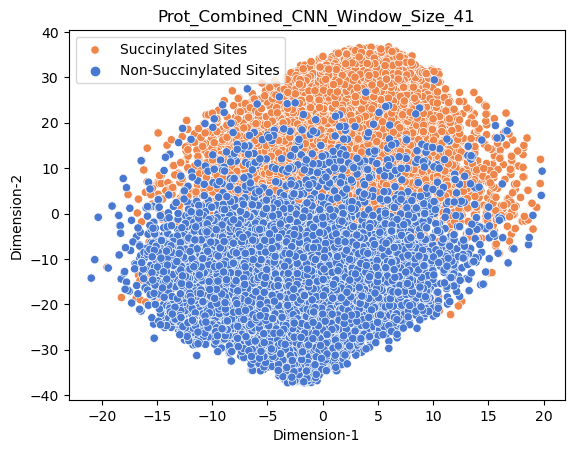

In [62]:
f, ax = plt.subplots(1, 1)
df = pd.DataFrame()
df["y"] = Y
df["Dimension-1"] = z[:,0]
df["Dimension-2"] = z[:,1]
sns.scatterplot(ax=ax, x="Dimension-1", y="Dimension-2", hue=df.y.tolist(),
                palette=sns.color_palette("muted", 2),
                data=df).set(title="Prot_Combined_CNN_Window_Size_41") 
ax.legend(labels=["Succinylated Sites", "Non-Succinylated Sites"])
plt.savefig("/kaggle/working/Prot_Combined_CNN_Window_Size_41.png")

# For meta classifier

In [3]:
MetaCombinedModel = tf.keras.models.load_model("/kaggle/input/meta-combined-31/meta_combine_win31_acc.h5", compile = False)
MetaCombinedModel.summary()

Model: "merged_layers"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv1d_36_input (InputLayer)   [(None, 31, 1024)]   0           []                               
                                                                                                  
 conv1d_38_input (InputLayer)   [(None, 31, 1024)]   0           []                               
                                                                                                  
 conv1d_36 (Conv1D)             (None, 31, 144)      147600      ['conv1d_36_input[0][0]']        
                                                                                                  
 conv1d_38 (Conv1D)             (None, 31, 144)      147600      ['conv1d_38_input[0][0]']        
                                                                                      

In [7]:
data_bert = np.load('/kaggle/input/databert2131/data31_bert.npz')
positive_bert = data_bert['positive']
negative_bert = data_bert['negative']
data_T5 = np.load('/kaggle/input/data31-t5/data31.npz')
positive_T5 = data_T5['positive']
negative_T5 = data_T5['negative']
print(positive_bert.shape, positive_T5.shape)

positive_dataset = np.hstack((positive_bert, positive_T5))
negative_dataset = np.hstack((negative_bert, negative_T5))
print(negative_dataset.shape[0])
X = np.vstack([positive_dataset, negative_dataset]) 
p_label = np.ones(positive_dataset.shape[0])
n_label = np.zeros(negative_dataset.shape[0])
Y = np.append(p_label,n_label,axis=0)
print(X.shape)

(4844, 31, 1024) (4844, 31, 1024)
5183
(10027, 62, 1024)


In [8]:
model_output = MetaCombinedModel.layers[-4].output
model_tsne = tf.keras.models.Model(inputs = MetaCombinedModel.input, outputs = model_output)
model_tsne.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv1d_36_input (InputLayer)   [(None, 31, 1024)]   0           []                               
                                                                                                  
 conv1d_38_input (InputLayer)   [(None, 31, 1024)]   0           []                               
                                                                                                  
 conv1d_36 (Conv1D)             (None, 31, 144)      147600      ['conv1d_36_input[0][0]']        
                                                                                                  
 conv1d_38 (Conv1D)             (None, 31, 144)      147600      ['conv1d_38_input[0][0]']        
                                                                                              

In [11]:
X_Cnn = model_tsne.predict([X[:, :31], X[:, 31:]])
print(X_Cnn[:3])

314/314 [==============================] - 3s 10ms/step
[[0.         0.         0.3509941  0.         0.         2.3052294
  2.6472173  0.         0.         3.0739503  0.14292334 0.
  0.11650478 0.2240257  0.9086216  0.         2.18494    0.
  1.8642378  0.24346305 0.         3.2125952  0.24156724 1.4093733
  0.         0.         0.         0.         1.6597825  0.
  1.9814222  1.1712546  0.         0.         2.4218063  0.
  0.7220017  1.657703   0.         0.         0.         0.39626563
  0.         0.21721816 1.5373917  0.         0.         2.8470404
  0.         0.59818053 1.0723885  0.         0.41637418 0.
  0.         0.         0.         1.1501776  0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.0732403  0.         0.         1.3694777
  1.0425994  0.         0.         1.6274042  1.2388412  0.
  1.0286471  0.636012   0.834468   0.         1.9463403  0.
  0.5986251  1.5175729  0.         1.4310229  1.3995235  0.14188813
  0.         

In [12]:
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=50, n_iter=1500)
z = tsne.fit_transform(X_Cnn) 

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10027 samples in 0.001s...
[t-SNE] Computed neighbors for 10027 samples in 1.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10027
[t-SNE] Computed conditional probabilities for sample 2000 / 10027
[t-SNE] Computed conditional probabilities for sample 3000 / 10027
[t-SNE] Computed conditional probabilities for sample 4000 / 10027
[t-SNE] Computed conditional probabilities for sample 5000 / 10027
[t-SNE] Computed conditional probabilities for sample 6000 / 10027
[t-SNE] Computed conditional probabilities for sample 7000 / 10027
[t-SNE] Computed conditional probabilities for sample 8000 / 10027
[t-SNE] Computed conditional probabilities for sample 9000 / 10027
[t-SNE] Computed conditional probabilities for sample 10000 / 10027
[t-SNE] Computed conditional probabilities for sample 10027 / 10027
[t-SNE] Mean sigma: 0.536677
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.845253
[t-SNE] KL

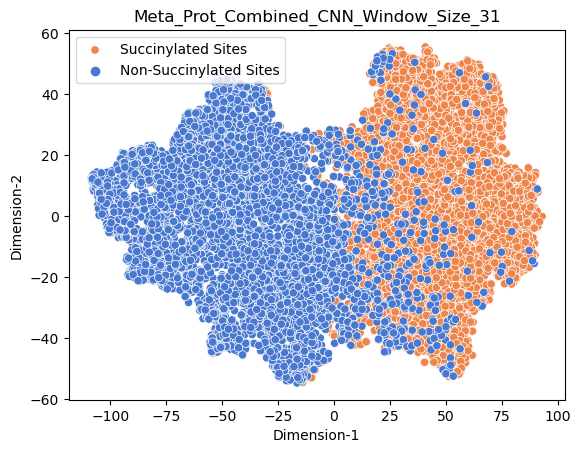

In [13]:
f, ax = plt.subplots(1, 1)
df = pd.DataFrame()
df["y"] = Y
df["Dimension-1"] = z[:,0]
df["Dimension-2"] = z[:,1]
sns.scatterplot(ax=ax, x="Dimension-1", y="Dimension-2", hue=df.y.tolist(),
                palette=sns.color_palette("muted", 2),
                data=df).set(title="Meta_Prot_Combined_CNN_Window_Size_31") 
ax.legend(labels=["Succinylated Sites", "Non-Succinylated Sites"])
plt.savefig("/kaggle/working/Meta_Prot_Combined_CNN_Window_Size_31.png")

# Extra processing

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
modelT5 = tf.keras.models.load_model("/kaggle/input/data31-t5/combined_model-2.h5")
modelT5.summary()
modelT5.trainable = False
model_output = modelT5.layers[-5].output

def get_model():
    output = layers.Dense(64, activation = "relu")(model_output)
    output = layers.Dense(4, activation = "relu")(output)
    out = layers.Dense(1, activation = "sigmoid")(output)
    model_tsne = tf.keras.models.Model(inputs = modelT5.input, outputs = out)
    return model_tsne

def compile_model(model):
  model.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
  return model
# Function to get_score from the model given the training and test dataset

def get_score(model, X_train, X_test, y_train, y_test):
  # patient early stopping
#   es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
#   history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test), verbose=0, callbacks=[es])
  with tf.device("/gpu:0"):
      history = model.fit(X_train, y_train, epochs=30, batch_size = 2048, validation_data = (X_test, y_test), verbose=0)


  # X_shape = X_train.shape
  #X_train = np.expand_dims(X_train, axis=0)
  # datagen.fit(X_train)
  # fits the model on batches with real-time data augmentation:
  # model.fit(X_train, y_train, batch_size=32,epochs=20)

  train_acc_history = history.history['accuracy']
  val_acc_history = history.history['val_accuracy']
  # evaluate the model
  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return train_acc, test_acc, history

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 21, 64)            131136    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 10, 64)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 128)           8320      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 5, 128)           

In [7]:
model = get_model()
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6_input (InputLayer)  [(None, 21, 2048)]       0         
                                                                 
 conv1d_6 (Conv1D)           (None, 21, 64)            131136    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 10, 64)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 128)           8320      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 128)           0         
 1D)                                                       

In [5]:
import numpy as np
data = np.load("/kaggle/input/data21-t5/data21_t5.npz")
positive = data["positive"]
negative = data["negative"]

# Y_positive = np.ones(positive.shape[0])
# Y_negative = np.zeros(negative.shape[0])
X_T5 = np.concatenate((positive, negative), axis=0)

data = np.load("/kaggle/input/bert-data/data21_bert.npz")
positive = data["positive"]
negative = data["negative"]

Y_positive = np.ones(positive.shape[0])
Y_negative = np.zeros(negative.shape[0])
X_bert = np.concatenate((positive, negative), axis=0)

X = np.concatenate((X_T5, X_bert), axis=-1)
Y = np.concatenate((Y_positive, Y_negative), axis=0)
print(X.shape)

(10027, 21, 2048)


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score
import gc
X_train, X_t, Y_train, Y_t = train_test_split( X, Y, test_size=0.05, random_state=42)
folds = StratifiedKFold(n_splits=20, shuffle= True)
scores = {}
scores['train_acc'] = []
scores['test_acc'] = []
max_test_acc = 0
max_mcc = 0
X_training = X_train
Y_training = Y_train
X_te = X_t
y_true = Y_t
hist = None
for train_index, test_index in folds.split(X_training,Y_training):
    X_train, X_test, y_train, y_test = X_training[train_index], X_training[test_index], \
                                    Y_training[train_index], Y_training[test_index]
    model = get_model()
    model = compile_model(model)
#     X_train = [X_train[:, :21], X_train[:, 21:]]
#     X_test = [X_test[:, :21], X_test[:, 21:]]
    train_acc, test_acc, history = get_score(model, X_train, X_test, y_train, y_test)
    y_pred = model.predict(X_te) > 0.5
    mcc = sklearn.metrics.matthews_corrcoef(y_true, y_pred)
    acc = sklearn.metrics.accuracy_score(y_true,y_pred)
    print("test mcc: {} test acc: {}".format(mcc,acc))
#     if test_acc > max_test_acc:
    if mcc > max_mcc:
        hist = history
        model.save('/kaggle/working/model1.h5')
#         max_test_acc = test_acc
        max_mcc = mcc
    print(train_acc, test_acc)
    scores['train_acc'].append(train_acc)
    scores['test_acc'].append(test_acc)
    del model
    del X_train
    del X_test
    del y_train
    del y_test
    gc.collect()


16/16 [==============================] - 0s 6ms/step
test mcc: 0.5768222769363043 test acc: 0.7888446215139442
0.9748010635375977 0.9706498980522156
16/16 [==============================] - 0s 6ms/step
test mcc: 0.5750694157702759 test acc: 0.7868525896414342
0.9755747318267822 0.9706498980522156
16/16 [==============================] - 0s 6ms/step
test mcc: 0.5822989703424313 test acc: 0.7908366533864541
0.9755747318267822 0.9769392013549805


In [ ]:
t_model = tf.keras.models.load_model("/kaggle/working/model1.h5")
y_pred = t_model.predict(X_t[115:130]) > 0.5
print(y_pred, Y_t[115:130])

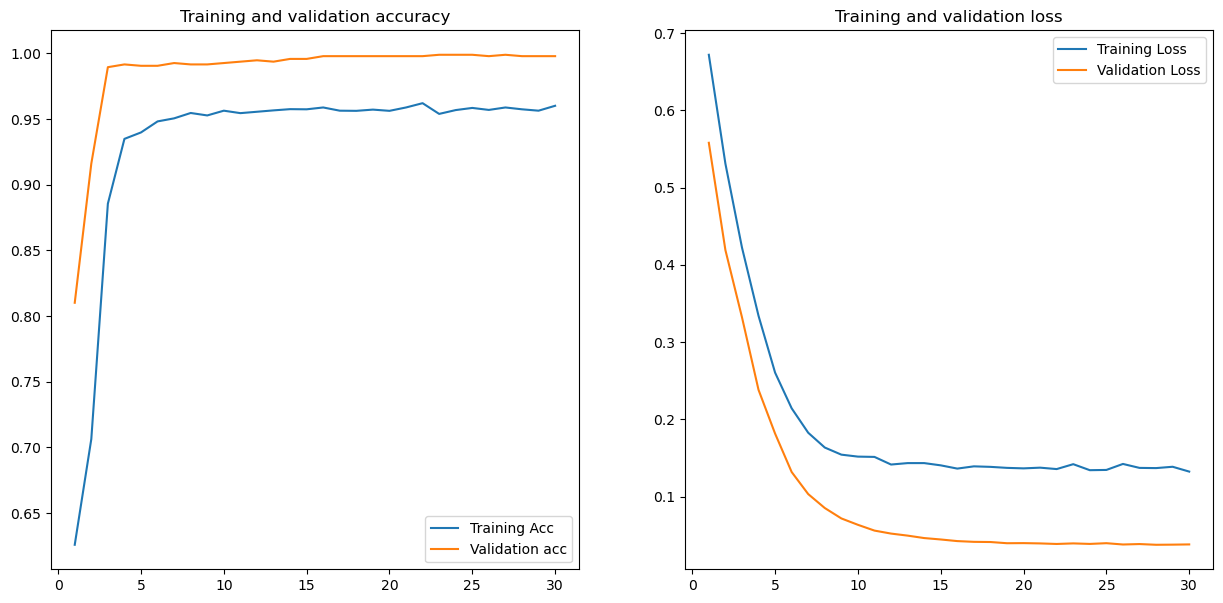

In [48]:
from matplotlib import pyplot as plt
train_acc_history = hist.history['accuracy']
val_acc_history = hist.history['val_accuracy']
loss_history = hist.history['loss']
val_loss_history = hist.history['val_loss']

epochs = range(1, len(train_acc_history) + 1)
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.plot(epochs, train_acc_history, label='Training Acc')
ax1.plot(epochs, val_acc_history, label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()
ax2.plot(epochs, loss_history, label='Training Loss')
ax2.plot(epochs, val_loss_history, label='Validation Loss')
ax2.set_title('Training and validation loss')
ax2.legend()

fig.savefig('combined_bert+T5_training_validation_acc_loss_for_data21 .jpg')

In [9]:
test_model = tf.keras.models.load_model('/kaggle/input/data31-t5/combined_model-2.h5')
test_model_output = test_model.layers[-5].output
model_tsne = tf.keras.models.Model(inputs = test_model.input, outputs = test_model_output)
model_tsne.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6_input (InputLayer)  [(None, 21, 2048)]       0         
                                                                 
 conv1d_6 (Conv1D)           (None, 21, 64)            131136    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 10, 64)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 128)           8320      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 128)           0         
 1D)                                                       

In [10]:
X_Cnn = model_tsne.predict(X)
print(X_Cnn[:3])

314/314 [==============================] - 2s 7ms/step
[[0.13445197 0.13157362 0.22303343 ... 0.26444688 0.         0.        ]
 [0.         0.         0.         ... 0.11385812 0.04301341 0.04422415]
 [0.         0.04204792 0.13809437 ... 0.22577173 0.14739446 0.12787971]]


In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=50, n_iter=1500)
z = tsne.fit_transform(X_Cnn) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10027 samples in 0.007s...


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10027 samples in 4.214s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10027
[t-SNE] Computed conditional probabilities for sample 2000 / 10027
[t-SNE] Computed conditional probabilities for sample 3000 / 10027
[t-SNE] Computed conditional probabilities for sample 4000 / 10027
[t-SNE] Computed conditional probabilities for sample 5000 / 10027
[t-SNE] Computed conditional probabilities for sample 6000 / 10027
[t-SNE] Computed conditional probabilities for sample 7000 / 10027
[t-SNE] Computed conditional probabilities for sample 8000 / 10027
[t-SNE] Computed conditional probabilities for sample 9000 / 10027
[t-SNE] Computed conditional probabilities for sample 10000 / 10027
[t-SNE] Computed conditional probabilities for sample 10027 / 10027
[t-SNE] Mean sigma: 0.805925
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.895248
[t-SNE] KL divergence after 1500 iterations: 2.950231


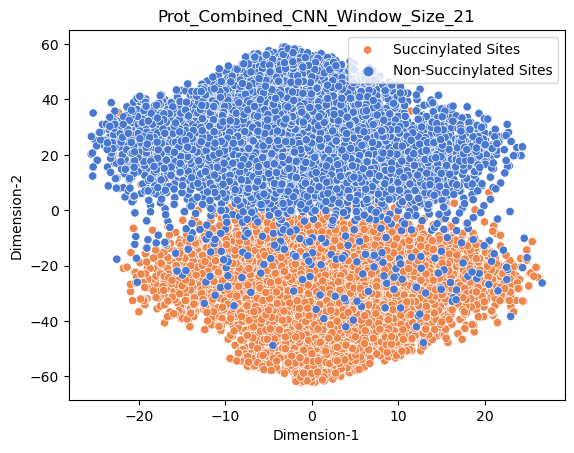

In [13]:
import pandas as pd
import seaborn as sns
f, ax = plt.subplots(1, 1)
df = pd.DataFrame()
df["y"] = Y
df["Dimension-1"] = z[:,0]
df["Dimension-2"] = z[:,1]
sns.scatterplot(ax=ax, x="Dimension-1", y="Dimension-2", hue=df.y.tolist(),
                palette=sns.color_palette("muted", 2),
                data=df).set(title="Prot_Combined_CNN_Window_Size_21") 
ax.legend(labels=["Succinylated Sites", "Non-Succinylated Sites"])
plt.savefig("/kaggle/working/Prot_Combined_CNN_Window_Size_21.png")

In [60]:
new_model = tf.keras.models.load_model("/kaggle/working/model1.h5")
y_pred = new_model.predict(X_t)> 0.5
mcc = sklearn.metrics.matthews_corrcoef(y_pred, Y_t)
print(mcc)

16/16 [==============================] - 0s 5ms/step
0.5858236146862318
